In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from collections import defaultdict
import shutil
from itertools import chain

# Проверка описания товара

In [8]:
desc = pd.read_csv("C:/temp/!hse-mlds-project-year2/data/Ювелирные&изделия_Четки/descriptions.csv")

In [9]:
desc

,item,description
0,0.png,ВНИМАНИЕ! Украшение для категории аксессуары в...
1,1.png,Четки Православные изготовлены из Кахолонга д-...
2,2.png,Четки Мусульманские изготовлены из зеленого ав...
3,3.png,"На бирке вес , штрих код и УИН , по которому В..."
4,4.png,Мусульманские четки изготовлены Агата д-10 мм ...
5,5.png,NaN
6,6.png,Мусульманские четки изготовлены из Кахолонга д...
7,7.png,Четки Мусульманские из агата 10 мм со вставкам...
8,8.png,Ювелирные мусульманские религиозные четки Куб...
9,9.png,Четки мусульманские изготовлены из граненого ч...


____

# Сбор статистики по спаршенным фотографиям

In [8]:
# root_dir = Path("C:/temp/!hse-mlds-project-year2/woman/woman")
# root_dir = Path("C:/temp/!hse-mlds-project-year2/data_beforefiltering/data")
root_dir = Path("C:/temp/!hse-mlds-project-year2/data_embed")

In [9]:
# Кол-во категорий
folders = os.listdir(root_dir)
len(folders)

1385

In [10]:
df_dict = {col: [] for col in ["card", "feedbacks"]}

for cat in folders:
    path = root_dir / cat
    path_card = path / "card"
    path_feedbacks = path / "feedbacks"

    # кол-во загруженных фоток
    load_card = len(sorted(path_card.glob('*')))
    load_feedbacks = len(sorted(path_feedbacks.glob('*')))
    
    if load_feedbacks < 0:
        print(f"{load_feedbacks} Feedbacks in {cat}")

#     if load_card < 20:
#         print(f"{load_card} Card in {cat}")

    df_dict["card"].append(load_card)
    df_dict["feedbacks"].append(load_feedbacks)

In [11]:
df = pd.DataFrame(df_dict)
df.head()

,card,feedbacks
0,20,16
1,20,10
2,20,17
3,20,20
4,20,18


In [12]:
df.describe()

,card,feedbacks
count,1385.000000,1385.000000
mean,20.314079,17.819495
std,3.952059,5.826295
min,4.000000,0.000000
25%,20.000000,17.000000
50%,20.000000,19.000000
75%,20.000000,20.000000
max,116.000000,109.000000


In [18]:
df.feedbacks.value_counts()

feedbacks
20    11
19     2
Name: count, dtype: int64

In [8]:
df.card.value_counts()

card
20    1575
19       2
18       1
4        1
1        1
Name: count, dtype: int64

18 Card in Дом_Кухня_Кухонный&текстиль_Чехлы&для&ручек&холодильников  
4 Card in Дом_Освещение_Лифты&для&люстр                                _(удалить либо перенести)_  
19 Card in Мебель_Гардеробная&мебель_Ящики                             _(можно до 20 добрать)_  
1 Card in Мебель_Офисная&мебель_Перегородки&офисные                    _(удалить либо перенести)_  
19 Card in Мебель_Офисная&мебель_Шкафы  

___

# Проверка на дубликаты ссылок

In [271]:
categories = pd.read_csv("wb_categories_full_clear.csv")
categories.head()

,category_1,category_2,category_3,category_4,category_5,url
0,Автотовары,Инструменты,Наборы инструментов,NaN,NaN,https://www.wildberries.ru/catalog/avtotovary/...
1,Автотовары,Масла и жидкости,Трансмиссионное масло,NaN,NaN,https://www.wildberries.ru/catalog/avtotovary/...
2,Автотовары,Масла и жидкости,Жидкости эксплуатационные,NaN,NaN,https://www.wildberries.ru/catalog/avtotovary/...
3,Автотовары,Масла и жидкости,Гидравлические жидкости и масла,NaN,NaN,https://www.wildberries.ru/catalog/avtotovary/...
4,Автотовары,Масла и жидкости,Промывочные масла,NaN,NaN,https://www.wildberries.ru/catalog/avtotovary/...


In [277]:
list(categories[437:442]["url"])

['https://www.wildberries.ru/catalog/dlya-doma/predmety-interera/fotoramki-i-fotoalbomy/fotoalbomy',
 'https://www.wildberries.ru/catalog/dlya-doma/predmety-interera/kartiny/ramy-dlya-posterov',
 'https://www.wildberries.ru/catalog/dlya-doma/predmety-interera/kartiny/postery/detskaya-tematika',
 'https://www.wildberries.ru/catalog/dlya-doma/predmety-interera/kartiny/kartiny/art-i-abstraktsiya',
 'https://www.wildberries.ru/catalog/dlya-doma/predmety-interera/kartiny/postery/fentezi']

In [181]:
df_dupl = categories[categories.duplicated(['url'], keep=False)]
df_dupl

,category_1,category_2,category_3,category_4,category_5,url
0,Автотовары,Мойки высокого давления и аксессуары,Цепные пилы,NaN,NaN,https://www.wildberries.ru/catalog/dom/dachniy...
13,Автотовары,Автоэлектроника и навигация,NaN,NaN,NaN,https://www.wildberries.ru/catalog/elektronika...
14,Автотовары,Аккумуляторы и сопутствующие товары,NaN,NaN,NaN,https://www.wildberries.ru/catalog/aksessuary/...
48,Автотовары,Мойки высокого давления и аксессуары,Аксессуары и запчасти для садовой техники,NaN,NaN,https://www.wildberries.ru/catalog/dom/dachniy...
49,Автотовары,Мойки высокого давления и аксессуары,Садовые измельчители,NaN,NaN,https://www.wildberries.ru/catalog/dom/dachniy...
...,...,...,...,...,...,...
1647,Электроника,Смартфоны и телефоны,Стационарные телефоны,NaN,NaN,https://www.wildberries.ru/catalog/elektronika...
1648,Электроника,Смартфоны и телефоны,Смартфоны,NaN,NaN,https://www.wildberries.ru/catalog/elektronika...
1649,Электроника,Смартфоны и телефоны,Планшеты,NaN,NaN,https://www.wildberries.ru/catalog/elektronika...
1650,Электроника,Смартфоны и телефоны,Мобильные телефоны,NaN,NaN,https://www.wildberries.ru/catalog/elektronika...


In [182]:
df_dupl.index

Index([   0,   13,   14,   48,   49,   50,   51,   52,   68,   69,
       ...
       1640, 1641, 1642, 1643, 1646, 1647, 1648, 1649, 1650, 1651],
      dtype='int64', length=156)

In [183]:
duplicates = defaultdict(list)

for ind in df_dupl.index:
    url = df_dupl.loc[ind]["url"]
    duplicates[url].append(ind)

In [184]:
print(len(duplicates))
duplicates

69


defaultdict(list,
            {'https://www.wildberries.ru/catalog/dom/dachniy-sezon/sadovaya-tehnika/tsepnye-pily': [0,
              1440,
              1480],
             'https://www.wildberries.ru/catalog/elektronika/avtoelektronika': [13,
              259],
             'https://www.wildberries.ru/catalog/aksessuary/avtotovary/akkumulyatory-i-soputstvuyushchie-tovary': [14,
              1588],
             'https://www.wildberries.ru/catalog/dom/dachniy-sezon/sadovaya-tehnika/aksessuary-i-zapchasti-dlya-sadovoy-tehniki': [48,
              1473,
              1475],
             'https://www.wildberries.ru/catalog/dom/dachniy-sezon/sadovaya-tehnika/sadovye-izmelchiteli': [49,
              1470,
              1476],
             'https://www.wildberries.ru/catalog/dom/dachniy-sezon/sadovaya-tehnika/motobury-i-aksessuary-k-nim': [50,
              1478,
              1498],
             'https://www.wildberries.ru/catalog/dom/dachniy-sezon/sadovaya-tehnika/kultivatory-i-motoblo

In [185]:
categories["url"][207], categories["url"][976]

('https://www.wildberries.ru/catalog/podarki/detyam/shariki-i-upakovka',
 'https://www.wildberries.ru/catalog/knigi/bukinistika/lyubovnye-romany')

In [186]:
df_duplicates = pd.DataFrame(duplicates.items(), columns=["url", "index"])

In [187]:
#df_duplicates.to_csv("wb_categories_dublicates.csv", index=False)

In [24]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [25]:
df[df.duplicated(['style'], keep=False)]

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


___

## удаление дубликатов

In [188]:
df_duplicates_choose = pd.read_csv("E://!docum//!HSE магистратура//Задание диплом//wb_categories_dublicates.csv")
#df_duplicates = pd.read_csv("wb_categories_dublicates.csv")

df_duplicates_choose = pd.concat([df_duplicates_choose[:12],
                                  pd.DataFrame([np.nan], columns=["choose_category"]),
                                  df_duplicates_choose[12:]], axis=0)
df_duplicates_choose.reset_index(drop=True, inplace=True)

df_duplicates = pd.concat([df_duplicates, df_duplicates_choose], axis=1)
#df_duplicates["delete"] = df_duplicates["index"].copy(deep=True)

In [189]:
df_duplicates.apply(lambda x : x["index"].remove(x["choose_category"]) if (str(x["choose_category"]) != "nan") else x["index"], axis=1);

In [190]:
df_duplicates

,url,index,choose_category
0,https://www.wildberries.ru/catalog/dom/dachniy...,"[0, 1440]",1480.0
1,https://www.wildberries.ru/catalog/elektronika...,[259],13.0
2,https://www.wildberries.ru/catalog/aksessuary/...,[1588],14.0
3,https://www.wildberries.ru/catalog/dom/dachniy...,"[48, 1473]",1475.0
4,https://www.wildberries.ru/catalog/dom/dachniy...,"[49, 1470]",1476.0
...,...,...,...
64,https://www.wildberries.ru/catalog/elektronika...,[1537],1642.0
65,https://www.wildberries.ru/catalog/elektronika...,[1549],1634.0
66,https://www.wildberries.ru/catalog/elektronika...,[1558],1633.0
67,https://www.wildberries.ru/catalog/elektronika...,[1559],1632.0


In [200]:
root_dir = Path("C:/temp/!hse-mlds-project-year2/data")

In [201]:
folders_name = []

for i in range(len(categories)):
    if str(categories.iloc[i]["category_5"]) == "nan":
        if str(categories.iloc[i]["category_4"]) == "nan":
            if str(categories.iloc[i]["category_3"]) == "nan":
                if str(categories.iloc[i]["category_2"]) == "nan":
                    cat = list(categories.iloc[i][:1])
                else:
                    cat = list(categories.iloc[i][:2])
            else:
                cat = list(categories.iloc[i][:3])
        else:
            cat = list(categories.iloc[i][:4])
    else:
        cat = list(categories.iloc[i][:5])
    folder = "_".join(["&".join(i.split()) for i in cat])
    folders_name.append(folder)

In [209]:
delete_index = list(chain(*list(df_duplicates["index"])))

In [214]:
len(delete_index)

88

In [211]:
for ind in delete_index:
    shutil.rmtree(root_dir / folders_name[ind])

___

# Сбор статистики по спаршенным описаниям

In [2]:
root_dir = Path("C:/temp/!hse-mlds-project-year2/data")

In [64]:
# Кол-во категорий
folders = os.listdir(root_dir)
len(folders)

1580

In [65]:
total_len = 0
total_descriptions = 0
for i in range(len(folders)):
    descriptions =  pd.read_csv(root_dir / folders[i] / "descriptions.csv")
    total_len += len(descriptions)
    total_descriptions += descriptions.notna().sum()["description"]

In [66]:
total_descriptions / total_len * 100

99.8011609634072

___

# Кол-во категорий

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import typing
from sklearn.preprocessing import LabelEncoder

In [68]:
def get_target(data_dir: Path,
               le: typing.Optional[LabelEncoder] = None,
               label_encoder_pickle_file: Path = Path.cwd() / "data" / "labelencoder.pkl",
               feedbacks : bool = True,
               level : int = 1,
               category1: str = None,
               category2: str = None,
               category3: str = None,
               category4: str = None,
               ):

    folders = os.listdir(data_dir)
    
    if level not in range(1,6):
        raise ValueError("The value of 'level' must be 1, 2, 3, 4 or 5")
    
    if level == 1:
        categories = folders

    elif level == 2:
        if category1 is None:
            raise TypeError("choose_category() missing 1 required positional argument: 'category1'")
        categories = [category for category in folders if category.split("_")[0]==category1]

    elif level == 3:
        if category1 is None or category2 is None:
            raise TypeError("choose_category() missing required positional argument: 'category1' or 'category2'")
        categories = [category for category in folders if (category.split("_")[0]==category1) and (category.split("_")[1]==category2)]

    elif level == 4:
        if category1 is None or category2 is None or category3 is None:
            raise TypeError("choose_category() missing required positional argument: 'category1', 'category2' or 'category3'")
        categories = [category for category in folders if (category.split("_")[0]==category1) and (category.split("_")[1]==category2) and (category.split("_")[2]==category3)]

    elif level == 5:
        if category1 is None or category2 is None or category3 is None  or category4 is None:
            raise TypeError("choose_category() missing required positional argument: 'category1', 'category2', 'category3' or 'category4'")
        categories = [category for category in folders if (category.split("_")[0]==category1) and (category.split("_")[1]==category2) and (category.split("_")[2]==category3) and (category.split("_")[3]==category4)]
    
    if feedbacks:
        paths_card = [data_dir / category / "card" for category in categories]
        paths_feedbacks = [data_dir / category / "feedbacks" for category in categories]
        img_paths = [sorted(sub_category.rglob("*.png")) for sub_category in paths_card + paths_feedbacks]
        img_paths = list(chain(*img_paths))
    else:
        paths_card = [data_dir / category / "card" for category in categories]
        img_paths = [sorted(sub_category.rglob("*.png")) for sub_category in paths_card]
        img_paths = list(chain(*img_paths))
    
    target = ["_".join(path.parts[-3:-2][0].split("_")[:level]) for path in img_paths]
    if level != 1:
        model_name = "_".join(target[0].split("_")[:level-1])
    else:
        model_name = "full_model"
    
    if not le:
        le = LabelEncoder()
        le = le.fit(target)

    target_enc = le.transform(target)

    # Соотнесения закодированного таргета и названий категорий
    dict_topic = dict(zip(target, target_enc))
    target2idx = dict(sorted(dict_topic.items(), key=lambda item: item[1]))
    idx2target = dict(zip(target_enc, target))
    
    return img_paths, target_enc, target2idx, idx2target, model_name

In [71]:
img_paths, target_enc, target2idx, idx2target, model_name = get_target(root_dir,
                                                              feedbacks=False,
                                                              level=1)

In [72]:
count_items = defaultdict()

for key in idx2target.keys():
    string = pd.DataFrame(target_enc).value_counts().loc[key]
    count_items[idx2target[key]] = string.values[0]

In [78]:
len(count_items.keys())

22

In [101]:
labels = list(count_items.keys())
labels.insert(6, list(count_items.keys())[15])
data = list(count_items.values())
data.insert(6, list(count_items.values())[15])
data.pop(16)
labels.pop(16)

'Народные&Промыслы'

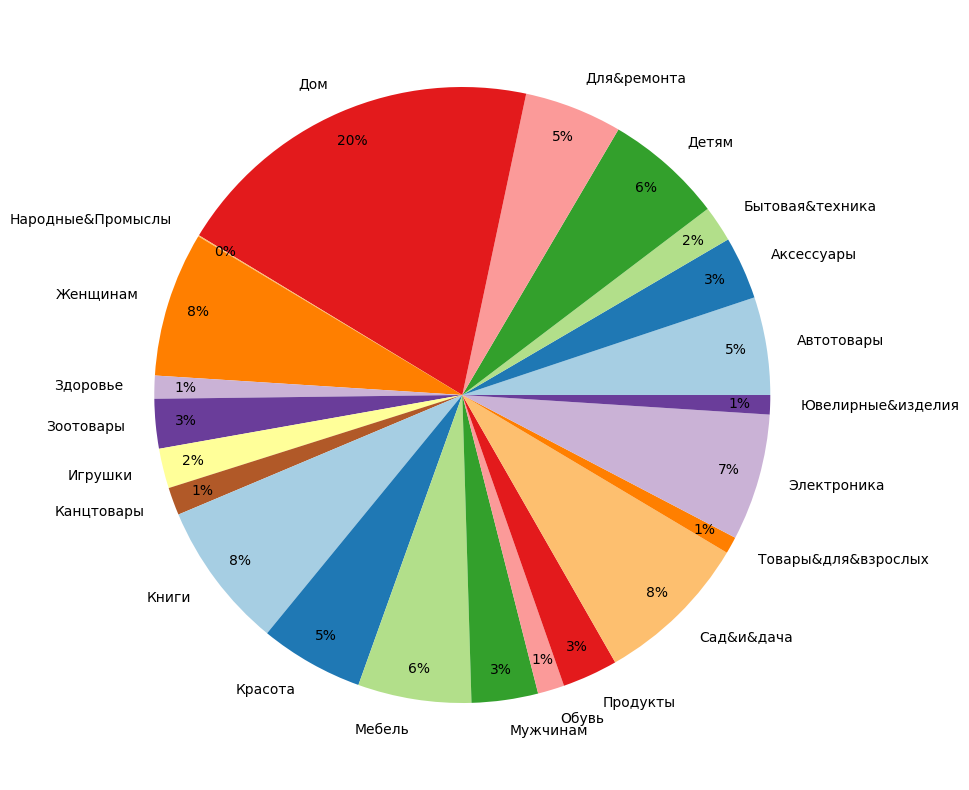

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))
colors = sns.color_palette('Paired')[0:23]

plt.pie(data, labels=labels, colors = colors, autopct='%.0f%%', pctdistance=0.9)
plt.savefig("amount_of_categoty.png", bbox_inches='tight', format="png")
plt.show()

 - "Автотовары" 1296 324
 - "Аксессуары" 832 208
 - "Бытовая&техника" 480 120
 - "Детям" 1568 392
 - "Для&ремонта" 1296 324
 - "Дом" 4961 1241
 - "Женщинам" 1920 480
 - "Здоровье" 304 76
 - "Зоотовары" 656 164
 - "Игрушки" 528 132
 - "Канцтовары" 368 92
 - "Книги" 1952 488
 - "Красота" 1376 344
 - "Мебель" 1503 376
 - "Мужчинам" 880 220
 - "Обувь" 352 88
 - "Продукты" 736 184
 - "Сад&и&дача" 2064 516
 - "Товары&для&взрослых" 224 56
 - "Электроника" 1680 420
 - "Ювелирные&изделия" 256 64

In [111]:
categories1 = list(count_items.keys())
categories1.remove("Народные&Промыслы")

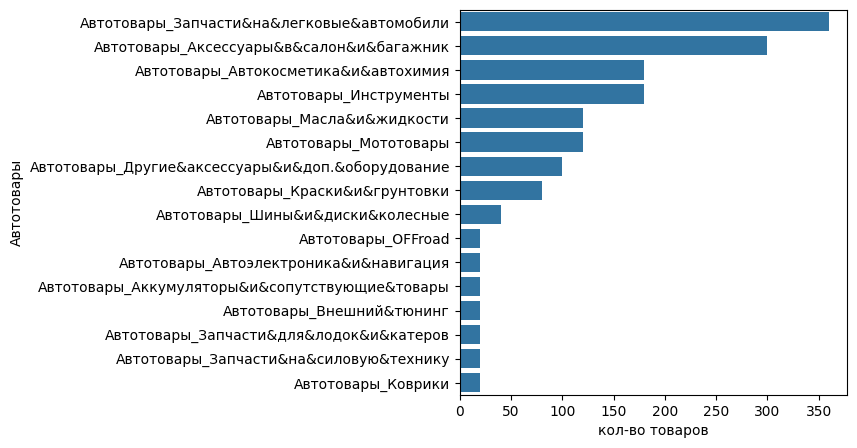

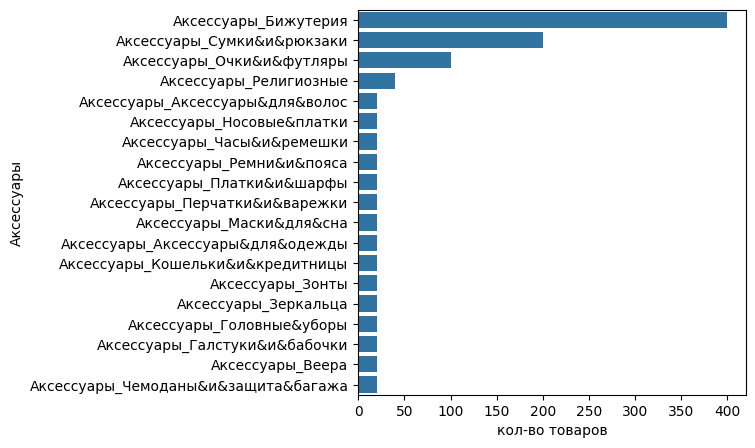

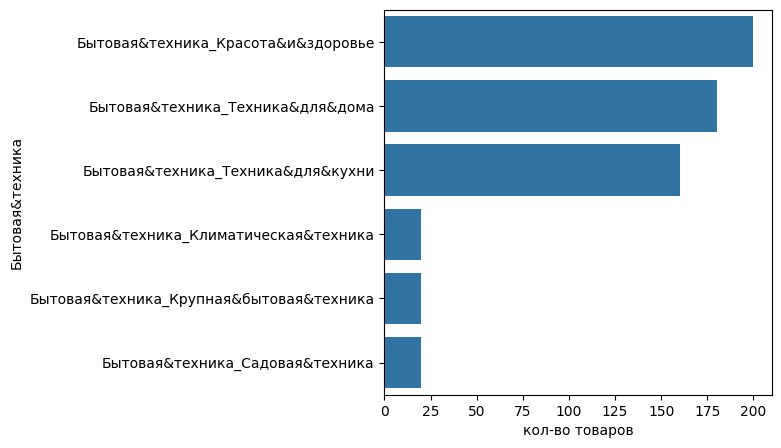

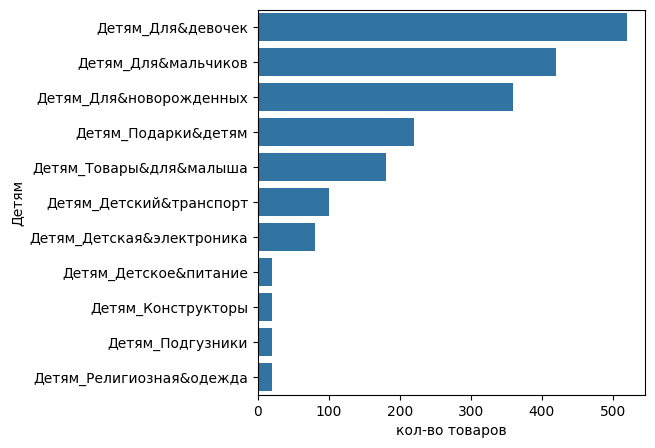

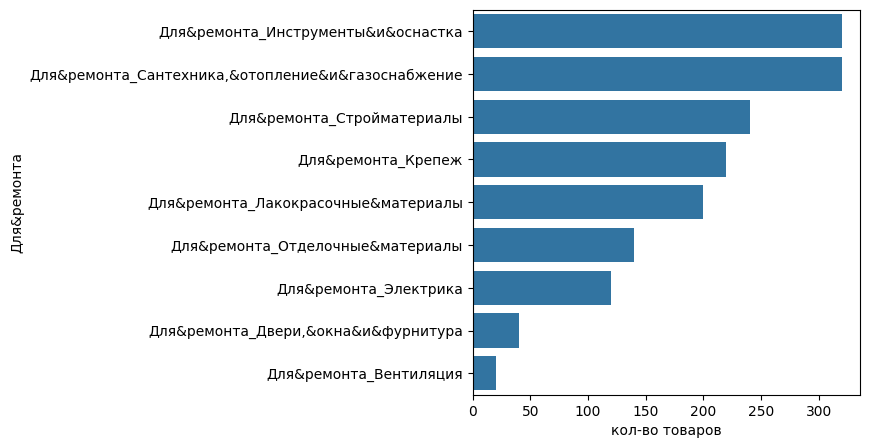

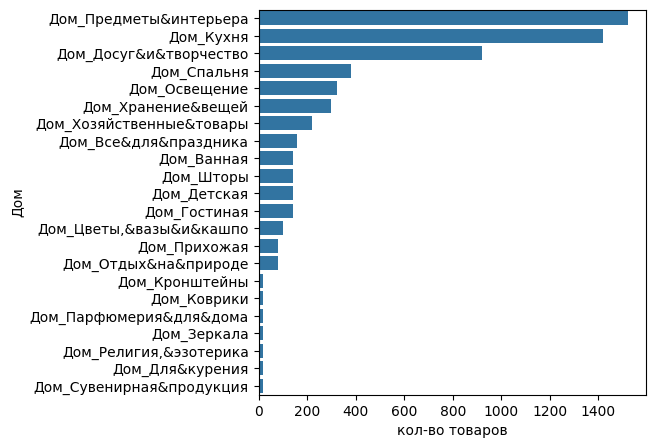

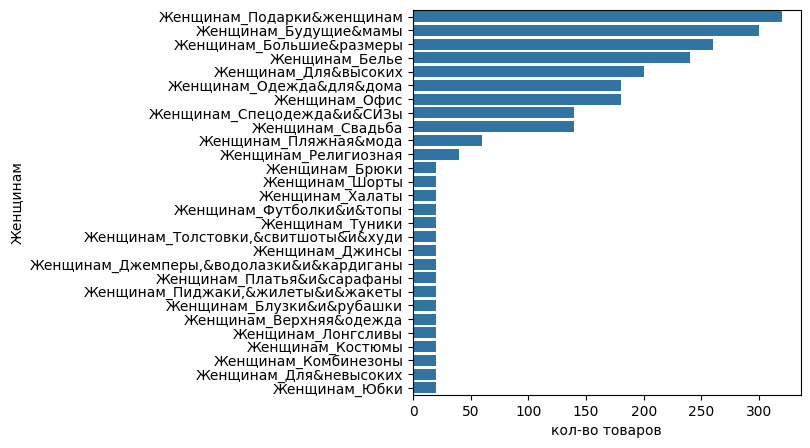

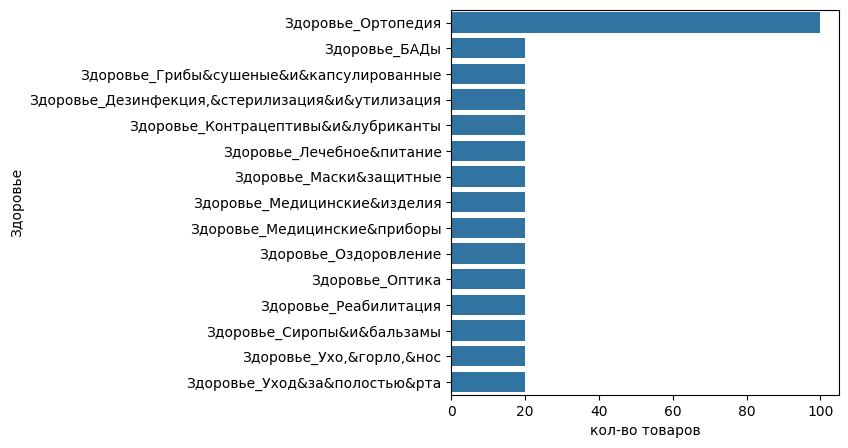

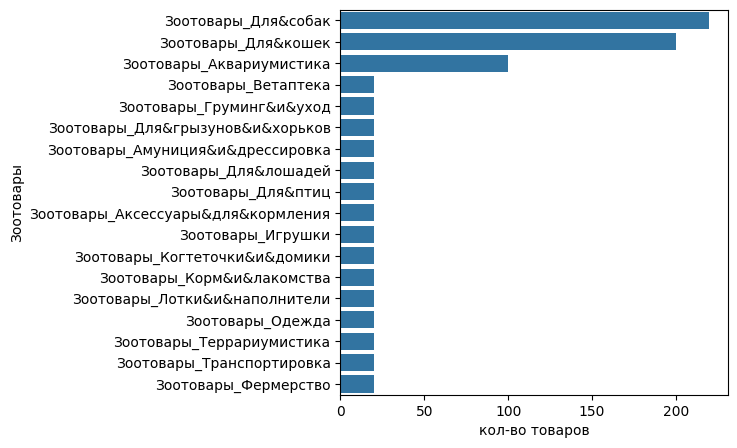

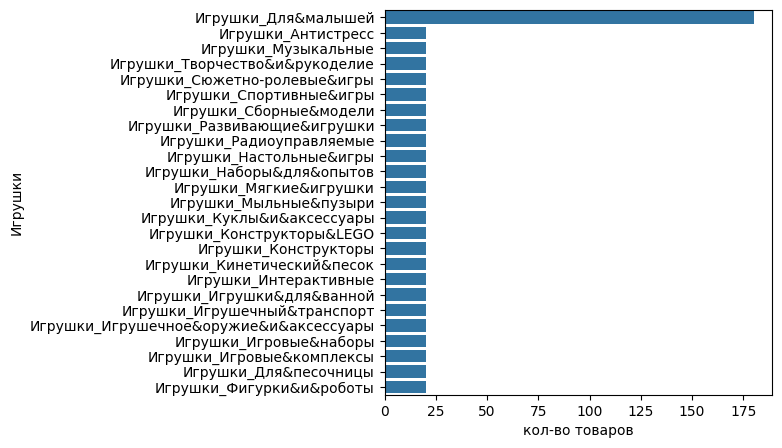

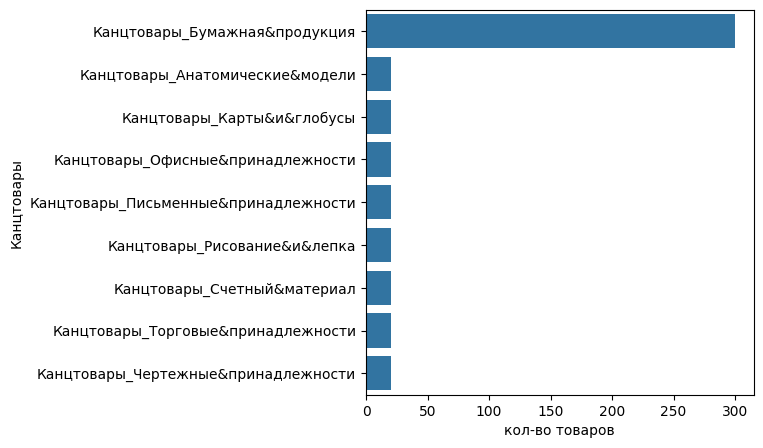

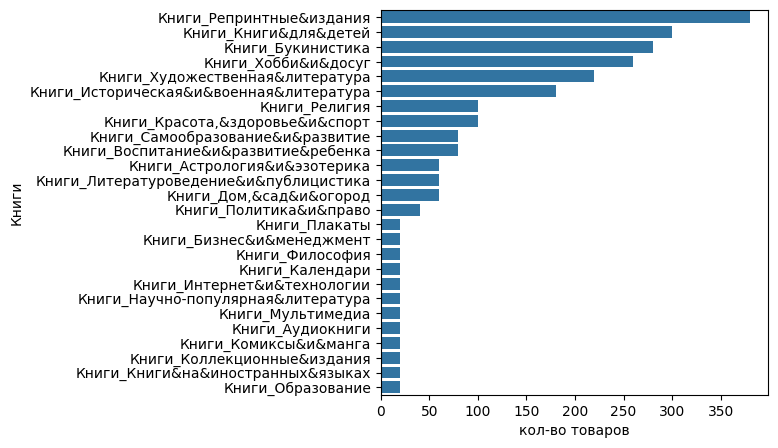

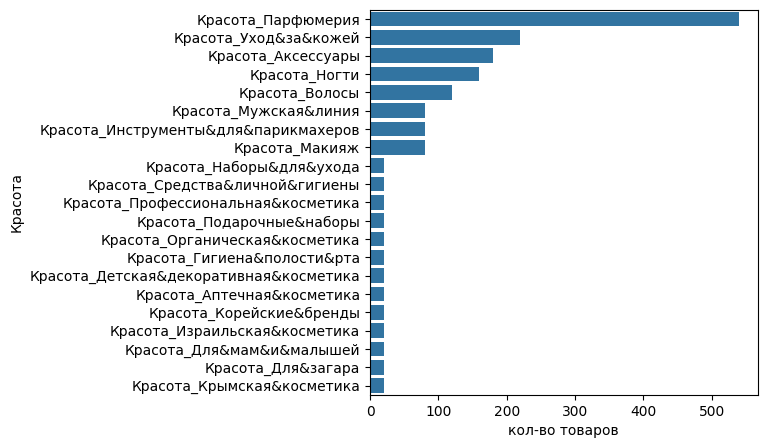

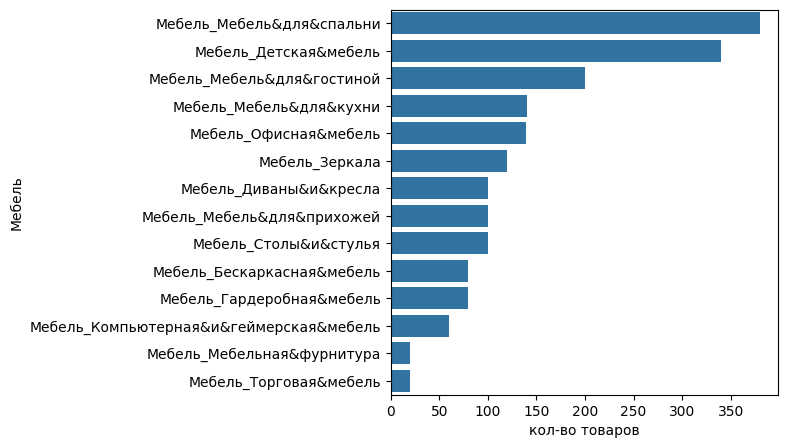

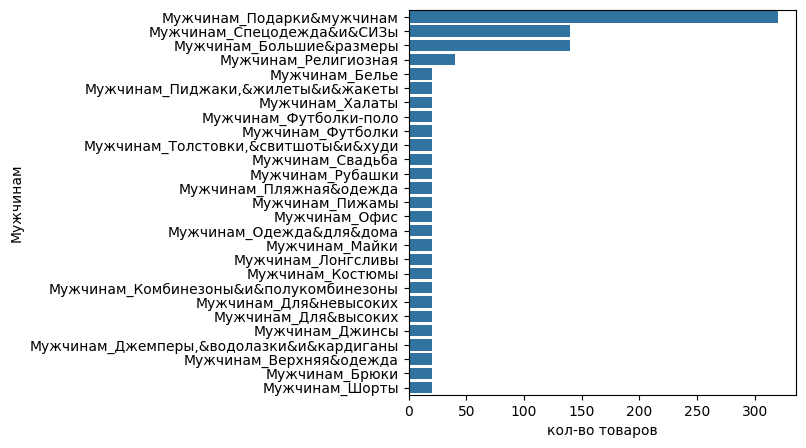

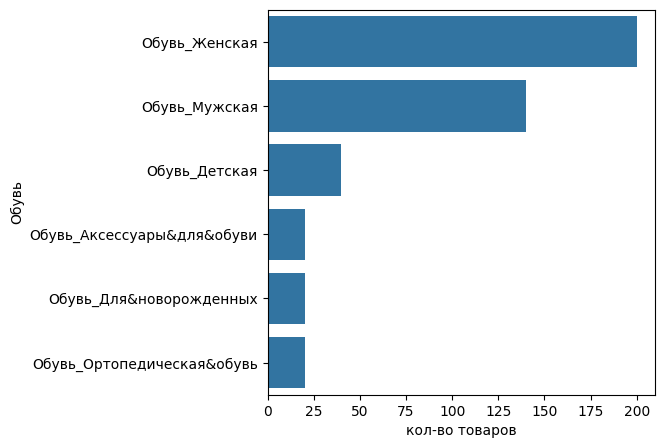

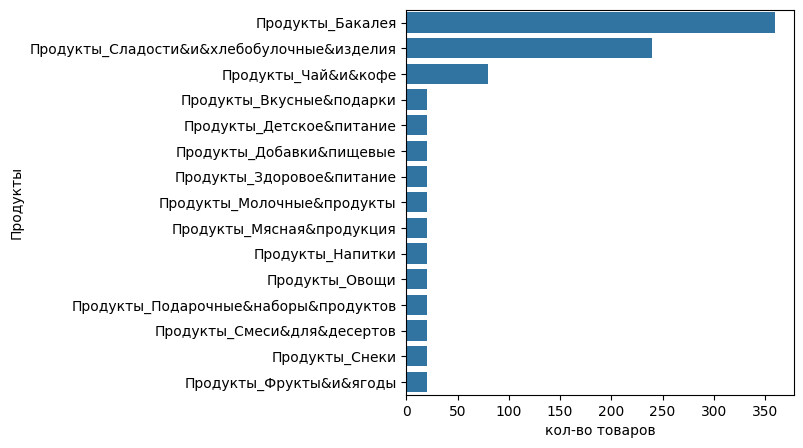

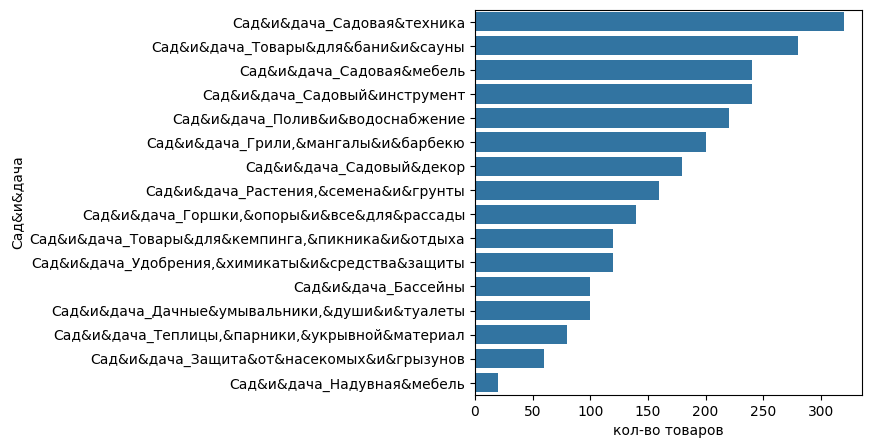

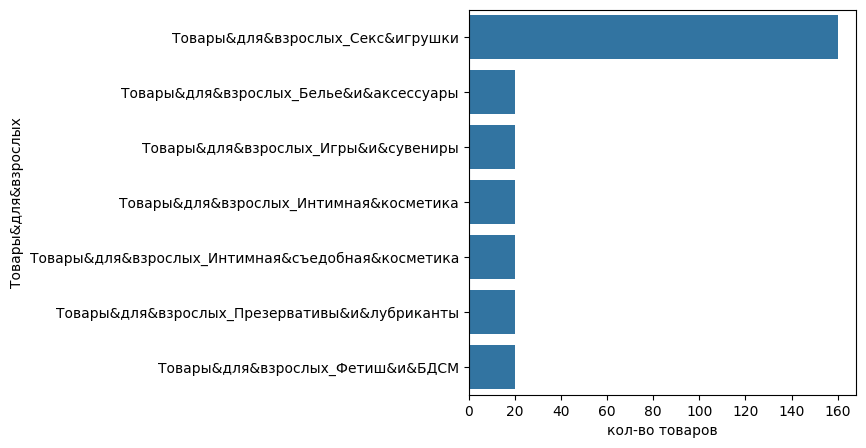

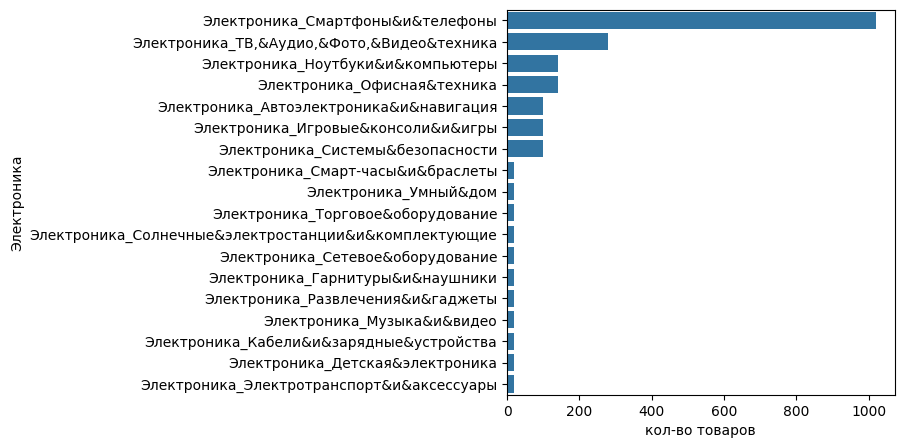

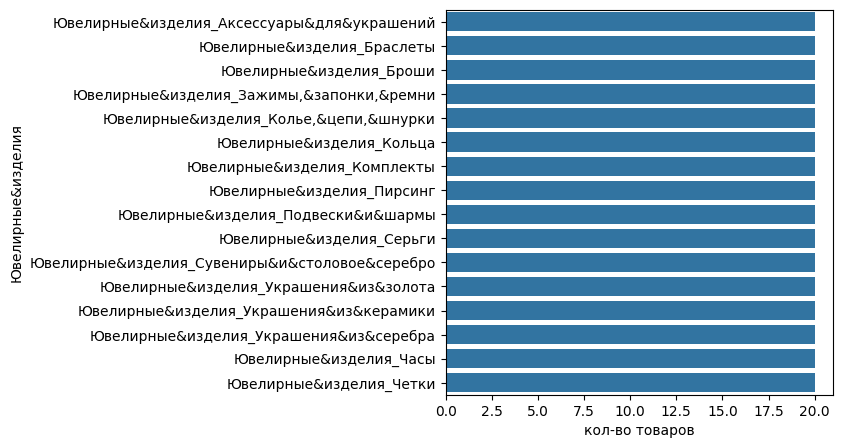

In [213]:
nrows, ncols = 21, 1
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5, 100))

for i in range(len(categories1)):
    fig, axes = plt.subplots(figsize=(5, 5))
    _, target_enc, _, idx2target, model_name = get_target(root_dir,
                                                          feedbacks=False,
                                                          level=2,
                                                          category1=categories1[i])
    df = pd.DataFrame(target_enc, columns=[model_name])
    df[model_name] = df[model_name].apply(lambda x: idx2target[x])
    df = pd.DataFrame(df.value_counts())
    df.reset_index(inplace=True)

    sns.barplot(x="count", y=model_name, data=df, orient="y")  
    axes.set_xlabel('кол-во товаров')

#     sns.barplot(ax=axes[i//ncols], x="count", y=model_name, data=df, orient="y")  
#     axes[i//ncols].set_xlabel('кол-во товаров')

    plt.savefig(f"amount_of_category_{model_name}.png", bbox_inches='tight', format="png")
    plt.show()

___

# Выбор категории

In [3]:
root_dir = Path("C:/temp/!hse-mlds-project-year2/data")
root_dir = Path("C:/temp/!hse-mlds-project-year2/data_embed")

In [4]:
# Кол-во категорий
folders = os.listdir(root_dir)
len(folders)

1385

In [5]:
def choose_category(level, folders, category1=None, category2=None, category3=None, category4=None):
    if level == 1:
        tree = {(category.split("_")[0], 2) if len(category.split("_"))>1 else (category.split("_")[0], 1) for category in folders}

    elif level == 2:
        if category1 is None:
            raise TypeError("choose_category() missing 1 required positional argument: 'category1'")
        categories = [category for category in folders if category.split("_")[0]==category1]
        tree = {(category.split("_")[1], 3) if len(category.split("_"))>2 else (category.split("_")[1], 2) for category in categories}

    elif level == 3:
        if category1 is None or category2 is None:
            raise TypeError("choose_category() missing required positional argument: 'category1' or 'category2'")
        categories = [category for category in folders if (category.split("_")[0]==category1) and (category.split("_")[1]==category2)]
        tree = {(category.split("_")[2], 4) if len(category.split("_"))>3 else (category.split("_")[2], 3) for category in categories}

    elif level == 4:
        if category1 is None or category2 is None or category3 is None:
            raise TypeError("choose_category() missing required positional argument: 'category1', 'category2' or 'category3'")
        categories = [category for category in folders if (category.split("_")[0]==category1) and (category.split("_")[1]==category2) and (category.split("_")[2]==category3)]
        tree = {(category.split("_")[3], 5) if len(category.split("_"))>4 else (category.split("_")[3], 4) for category in categories}

    elif level == 5:
        if category1 is None or category2 is None or category3 is None  or category4 is None:
            raise TypeError("choose_category() missing required positional argument: 'category1', 'category2', 'category3' or 'category4'")
        categories = [category for category in folders if (category.split("_")[0]==category1) and (category.split("_")[1]==category2) and (category.split("_")[2]==category3) and (category.split("_")[3]==category4)]
        tree = {(category.split("_")[4], 6) if len(category.split("_"))>5 else (category.split("_")[4], 5) for category in categories}
    
    return sorted(tree)

In [6]:
choose_category(1, folders, "Товары&для&взрослых", "Секс&игрушки", 'Картины&и&постеры', 'Картины')

[('Автотовары', 2),
 ('Аксессуары', 2),
 ('Бытовая&техника', 2),
 ('Детям', 2),
 ('Для&ремонта', 2),
 ('Дом', 2),
 ('Женщинам', 2),
 ('Здоровье', 2),
 ('Зоотовары', 2),
 ('Игрушки', 2),
 ('Канцтовары', 2),
 ('Книги', 2),
 ('Красота', 2),
 ('Мебель', 2),
 ('Мужчинам', 2),
 ('Народные&Промыслы', 1),
 ('Обувь', 2),
 ('Продукты', 2),
 ('Сад&и&дача', 2),
 ('Товары&для&взрослых', 2),
 ('Электроника', 2),
 ('Ювелирные&изделия', 2)]

In [34]:
choose_category(4, folders, "Дом", "Предметы&интерьера", 'Картины&и&постеры', 'Картины')

[('Гравюры', 4),
 ('Доски&для&записей', 4),
 ('Картины', 5),
 ('Картины&3D', 4),
 ('Картины&в&рамах', 4),
 ('Модульные&картины', 4),
 ('Постеры', 5),
 ('Постеры&в&рамах', 4),
 ('Рамы&багетные', 4),
 ('Рамы&для&постеров', 4),
 ('Таблички&информационные', 4)]

___

# Расчет кол-ва моделей в древовидном инференсе

In [43]:
num_models = 1
categories1 = {(category.split("_")[0], 2) for category in folders if len(category.split("_"))>1}

for cat1 in categories1:
    num_models += 1
    categories = [category for category in folders if category.split("_")[0]==cat1[0]]
    categories2 = {(category.split("_")[1], 3) for category in categories if len(category.split("_"))>2}
    
    for cat2 in categories2:
        num_models += 1
        categories = [category for category in folders if (category.split("_")[0]==cat1[0]) and (category.split("_")[1]==cat2[0])]
        categories3 = {(category.split("_")[2], 4) for category in categories if len(category.split("_"))>3}
        
        for cat3 in categories3:
            num_models += 1
            categories = [category for category in folders if (category.split("_")[0]==cat1[0]) and (category.split("_")[1]==cat2[0]) and (category.split("_")[2]==cat3[0])]
            categories4 = {(category.split("_")[3], 5) for category in categories if len(category.split("_"))>4}
            
            for cat4 in categories4:
                num_models += 1

In [44]:
num_models

171

Кол-во моделей:
 - `171 num_models` вложенность 5
 - `165 num_models` вложенность 4
 - `153 num_models` вложенность 3
 - `22 num_models` вложенность 2
 - `1 num_models` вложенность 1

___

# Функции для обработки датасета

In [56]:
# root_dir = Path("C:/temp/!hse-mlds-project-year2/data")
# root_dir = Path("C:/temp/!hse-mlds-project-year2/test")
root_dir = Path("C:/temp/!hse-mlds-project-year2/data_embed")

In [57]:
# Кол-во категорий
folders = os.listdir(root_dir)
print(len(folders))
folders

1385


['Автотовары_OFFroad',
 'Автотовары_Автокосметика&и&автохимия_Герметики&автомобильные',
 'Автотовары_Автокосметика&и&автохимия_Очистители&автомобильные',
 'Автотовары_Автокосметика&и&автохимия_Присадки',
 'Автотовары_Автокосметика&и&автохимия_Прочее&автохимия',
 'Автотовары_Автокосметика&и&автохимия_Смазки&автомобильные',
 'Автотовары_Автокосметика&и&автохимия_Уход&за&кузовом',
 'Автотовары_Автокосметика&и&автохимия_Уход&за&салоном',
 'Автотовары_Автокосметика&и&автохимия_Уход&за&стеклами&и&фарами',
 'Автотовары_Автокосметика&и&автохимия_Уход&за&шинами&и&дисками',
 'Автотовары_Аккумуляторы&и&сопутствующие&товары',
 'Автотовары_Аксессуары&в&салон&и&багажник_Аварийные&принадлежности',
 'Автотовары_Аксессуары&в&салон&и&багажник_Автокресла&и&аксессуары',
 'Автотовары_Аксессуары&в&салон&и&багажник_Автомобильные&компрессоры',
 'Автотовары_Аксессуары&в&салон&и&багажник_Аксессуары&для&водителя',
 'Автотовары_Аксессуары&в&салон&и&багажник_Ароматизаторы',
 'Автотовары_Аксессуары&в&салон&и&багажн

## удаление товаров

удаляет только feedback для указанного товара

In [6]:
def delete_feedbacks(path: Path, ind: list[int]):
    path = path / "feedbacks"
    paths_to_img = [path / f"{i}_feedbacks.png" for i in ind]
    for p in paths_to_img:
        os.remove(p)
    
    return paths_to_img

In [19]:
delete_feedbacks(path=root_dir / folders[2], ind=[4,6])

[WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Четки/feedbacks/4_feedbacks.png'),
 WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Четки/feedbacks/6_feedbacks.png')]

удаляет полностью card, description и feedback (если он есть) для указанного товара

In [7]:
def delete_card_and_description(path: Path, ind: list[int]):
    path_card = path / "card"
    path_feedbacks = path / "feedbacks"
    paths_card_img = [path_card / f"{i}.png" for i in ind]
    paths_feedbacks_img = [path_feedbacks / f"{i}_feedbacks.png" for i in ind]
    check_feedbacks = [True if path.exists() else False for path in paths_feedbacks_img]

    descriptions =  pd.read_csv(path / "descriptions.csv")
    descriptions.set_index(['item'], inplace=True)
    for i in range(len(ind)):
        
        # удаление описания
        try:
            descriptions.drop(index=paths_card_img[i].parts[-1], inplace=True)
        except Exception as e:
            print(e)
            return f"Упало на {paths_card_img[i]}"
        
        # удаление card
        try:
            os.remove(paths_card_img[i])
        except Exception as e:
            print(e)
            return f"Упало на {paths_card_img[i]}"
        
        # удаление feedbacks
        if check_feedbacks[i]:
            try:
                os.remove(paths_feedbacks_img[i])
            except Exception as e:
                print(e)
                return f"Упало на {paths_feedbacks_img[i]}"
        
    descriptions.reset_index(inplace=True)
    descriptions.to_csv(path / "descriptions.csv", index=False)
    return paths_card_img

In [188]:
paths_to_img = delete_card_and_description(path=root_dir / folders[0], ind=[9,10,12])
paths_to_img

[WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Украшения&из&серебра/card/9.png'),
 WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Украшения&из&серебра/card/10.png'),
 WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Украшения&из&серебра/card/12.png')]

## перенос товара в другую категорию

переносится полностью card, description и feedback (если он есть) для указанного товара

In [8]:
def move_items_to_another_category(path_from: Path,
                                   path_to: Path,
                                   ind: list[int]):
    from_path_card = path_from / "card"
    from_path_feedbacks = path_from / "feedbacks"
    from_paths_card_img = [from_path_card / f"{i}.png" for i in ind]
    from_paths_feedbacks_img = [from_path_feedbacks / f"{i}_feedbacks.png" for i in ind]
    check_feedbacks = [True if path.exists() else False for path in from_paths_feedbacks_img]

    to_path_card = path_to / "card"
    to_path_feedbacks = path_to / "feedbacks"
    start_name = int(sorted(path_to.rglob("*.png"), key=lambda x: int(x.stem.split('_')[0]))[-1].stem.split('_')[0])
    to_paths_card_img = [to_path_card / f"{i}.png" for i in range(start_name+1, start_name+1+len(ind))]
    to_paths_feedbacks_img = [to_path_feedbacks / f"{i}_feedbacks.png" for i in range(start_name+1, start_name+1+len(ind))]

    from_descriptions = pd.read_csv(path_from / "descriptions.csv")
    from_descriptions.set_index(['item'], inplace=True)
    to_descriptions = pd.read_csv(path_to / "descriptions.csv")
    to_descriptions.set_index(['item'], inplace=True)
    
    for i in range(len(ind)):
        
        # перемещение описания
        try:
            to_descriptions.loc[to_paths_card_img[i].parts[-1]] = from_descriptions.loc[from_paths_card_img[i].parts[-1]]["description"]
            from_descriptions.drop(index=from_paths_card_img[i].parts[-1], inplace=True)
        except Exception as e:
            print(e)
            return f"Упало на description of {from_paths_card_img[i]}"
        
        # перемещение card
        try:
            shutil.move(from_paths_card_img[i], to_paths_card_img[i])
        except Exception as e:
            print(e)
            return f"Упало на {from_paths_card_img[i]}"
        
        # перемещение feedbacks
        if check_feedbacks[i]:
            try:
                shutil.move(from_paths_feedbacks_img[i], to_paths_feedbacks_img[i])
            except Exception as e:
                print(e)
                return f"Упало на {from_paths_feedbacks_img[i]}"
            
    from_descriptions.reset_index(inplace=True)
    to_descriptions.reset_index(inplace=True)
    from_descriptions.to_csv(path_from / "descriptions.csv", index=False)
    to_descriptions.to_csv(path_to / "descriptions.csv", index=False)

    return (from_paths_card_img, to_paths_card_img)

In [192]:
logs = move_items_to_another_category(path_from=root_dir / folders[2],
                                      path_to=root_dir / folders[1],
                                      ind=[1,4,6])
logs

([WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Четки/card/1.png'),
  WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Четки/card/4.png'),
  WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Четки/card/6.png')],
 [WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Часы/card/20.png'),
  WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Часы/card/21.png'),
  WindowsPath('C:/temp/!hse-mlds-project-year2/test/Ювелирные&изделия_Часы/card/22.png')])

проверка описания

In [13]:
path = root_dir / "Зоотовары_Для&кошек_Транспортировка"
descriptions = pd.read_csv(path / "descriptions.csv")
descriptions.set_index(['item'], inplace=True)

In [15]:
path = root_dir / "Зоотовары_Для&собак_Транспортировка"
descriptions2 = pd.read_csv(path / "descriptions.csv")
descriptions2.set_index(['item'], inplace=True)

In [17]:
descriptions.iloc[6]

description    Представляем самую удобную сумку-переноску для...
Name: 6.png, dtype: object

In [18]:
descriptions.iloc[9]

description    Мягкая переноска для животных обеспечит непрев...
Name: 9.png, dtype: object

## изменения датасета

### Автотовары

In [13]:
shutil.rmtree(root_dir / "Автотовары_Запчасти&на&легковые&автомобили_Автозапчасти", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Автотовары_Автокосметика&и&автохимия_Уход&за&салоном',
                                      path_to=root_dir / 'Автотовары_Аксессуары&в&салон&и&багажник_Ароматизаторы',
                                      ind=[3, 4, 5, 7, 10, 13, 14, 16, 17, 18, 19])

paths_to_img = delete_card_and_description(path=root_dir / "Автотовары_Автокосметика&и&автохимия_Уход&за&салоном",
                                           ind=[2])

logs = move_items_to_another_category(path_from=root_dir / 'Автотовары_Автокосметика&и&автохимия_Уход&за&стеклами&и&фарами',
                                      path_to=root_dir / 'Автотовары_Масла&и&жидкости_Жидкости&эксплуатационные',
                                      ind=[4, 9, 18, 19])

paths_to_img = delete_card_and_description(path=root_dir / "Автотовары_Внешний&тюнинг",
                                           ind=[1, 3, 8, 9, 11, 12, 16, 17, 18])

logs = move_items_to_another_category(path_from=root_dir / 'Автотовары_Другие&аксессуары&и&доп.&оборудование_Охранные&системы',
                                      path_to=root_dir / 'Автотовары_Аксессуары&в&салон&и&багажник_Аксессуары&для&водителя',
                                      ind=[1, 11, 19])
logs = move_items_to_another_category(path_from=root_dir / 'Автотовары_Другие&аксессуары&и&доп.&оборудование_Другие&автоаксессуары',
                                      path_to=root_dir / 'Автотовары_Аксессуары&в&салон&и&багажник_Аксессуары&для&водителя',
                                      ind=[0, 1, 3, 4, 8, 14])
logs = move_items_to_another_category(path_from=root_dir / 'Автотовары_Автоэлектроника&и&навигация',
                                      path_to=root_dir / 'Автотовары_Другие&аксессуары&и&доп.&оборудование_Электроника',
                                      ind=[0, 2, 3, 4, 6, 8])

shutil.rmtree(root_dir / "Автотовары_Автоэлектроника&и&навигация", ignore_errors=True)

### Аксессуары

In [14]:
logs = move_items_to_another_category(path_from=root_dir / 'Аксессуары_Религиозные_Православие',
                                      path_to=root_dir / 'Аксессуары_Платки&и&шарфы',
                                      ind=[2, 3, 4, 5, 6, 7, 10, 11, 15, 16, 17, 18, 19])

shutil.rmtree(root_dir / "Аксессуары_Религиозные_Православие", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Аксессуары_Религиозные_Ислам',
                                      path_to=root_dir / 'Аксессуары_Бижутерия_Кольца',
                                      ind=[0,4])
logs = move_items_to_another_category(path_from=root_dir / 'Аксессуары_Религиозные_Ислам',
                                      path_to=root_dir / 'Аксессуары_Бижутерия_Браслеты',
                                      ind=[3,11,12,16,17,18,19])
logs = move_items_to_another_category(path_from=root_dir / 'Аксессуары_Религиозные_Ислам',
                                      path_to=root_dir / 'Аксессуары_Бижутерия_Четки',
                                      ind=[6,10])
paths_to_img = delete_card_and_description(path=root_dir / "Аксессуары_Религиозные_Ислам",
                                           ind=[1])
paths_to_img = delete_card_and_description(path=root_dir / "Аксессуары_Перчатки&и&варежки",
                                           ind=[3, 12])
paths_to_img = delete_card_and_description(path=root_dir / "Аксессуары_Очки&и&футляры_Аксессуары&для&очков",
                                           ind=[0, 7, 8, 12, 13])

logs = move_items_to_another_category(path_from=root_dir / 'Аксессуары_Бижутерия_Колье',
                                      path_to=root_dir / 'Аксессуары_Платки&и&шарфы',
                                      ind=[12,13])
paths_to_img = delete_card_and_description(path=root_dir / "Аксессуары_Бижутерия_Булавки&для&воротника",
                                           ind=[1])
paths_to_img = delete_card_and_description(path=root_dir / "Аксессуары_Аксессуары&для&одежды",
                                           ind=[7])
paths_to_img = delete_card_and_description(path=root_dir / "Аксессуары_Аксессуары&для&одежды",
                                           ind=[17])

### Детям

In [15]:
shutil.rmtree(root_dir / 'Детям_Подарки&детям_Вкусные&подарки', ignore_errors=True)
shutil.rmtree(root_dir / 'Детям_Детский&транспорт_Белье', ignore_errors=True)
shutil.rmtree(root_dir / 'Детям_Детский&транспорт_Одежда', ignore_errors=True)
shutil.rmtree(root_dir / 'Детям_Детский&транспорт_Аксессуары', ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Детям_Детский&транспорт_Обувь',
                                      path_to=root_dir / 'Детям_Для&девочек_Обувь',
                                      ind=[0, 1, 2, 3, 4, 6, 8, 9, 12, 16])

shutil.rmtree(root_dir / 'Детям_Детский&транспорт_Обувь', ignore_errors=True)

### Дом

In [16]:
paths_to_img = delete_card_and_description(path=root_dir / "Дом_Шторы_Тюли&и&гардины",
                                           ind=[5,6,14,15,18])
paths_to_img = delete_card_and_description(path=root_dir / "Дом_Шторы_Римские&и&рулонные&шторы",
                                           ind=[0,1,2,3,9,11,18,19])
paths_to_img = delete_card_and_description(path=root_dir / "Дом_Цветы,&вазы&и&кашпо_Кашпо",
                                           ind=[7,9])

logs = move_items_to_another_category(path_from=root_dir / 'Дом_Сувенирная&продукция',
                                      path_to=root_dir / 'Дом_Цветы,&вазы&и&кашпо_Кашпо',
                                      ind=[16])
logs = move_items_to_another_category(path_from=root_dir / 'Дом_Спальня_Шторы',
                                      path_to=root_dir / 'Дом_Шторы_Шторы&и&портьеры',
                                      ind=[0,9,12,14])

shutil.rmtree(root_dir / "Дом_Спальня_Шторы", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Спальня_Хранение&вещей", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Прихожая_Хранение&вещей", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Прихожая_Освещение", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Прихожая_Мебель", ignore_errors=True)

paths_to_img = delete_card_and_description(path=root_dir / "Дом_Предметы&интерьера_Фоторамки&и&фотоальбомы_Фотофоны",
                                           ind=[1,2,3,4,5,6,9,10,12])
paths_to_img = delete_card_and_description(path=root_dir / "Дом_Предметы&интерьера_Свечи&и&подсвечники",
                                           ind=[15])
paths_to_img = delete_card_and_description(path=root_dir / "Дом_Предметы&интерьера_Подушки&и&чехлы",
                                           ind=[6,7,16])
shutil.rmtree(root_dir / "Дом_Предметы&интерьера_Наклейки&и&декор", ignore_errors=True)
paths_to_img = delete_card_and_description(path=root_dir / "Дом_Предметы&интерьера_Картины&и&постеры_Постеры&в&рамах",
                                           ind=[0])

shutil.rmtree(root_dir / "Дом_Гостиная_Шторы", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Гостиная_Коробки&для&хранения", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Гостиная_Мебель", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Гостиная_Декорации&настенные", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Гостиная_Коврики&комнатные", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Гостиная_Освещение", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Гостиная_Подушки&декоративные", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Детская_Шторы", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Детская_Постельные&принадлежности", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Детская_Предметы&интерьера", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Детская_Освещение", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Детская_Хранение&вещей", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Спальня_Зеркала", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Предметы&интерьера_Подушки&и&чехлы", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Отдых&на&природе_Мебель&и&текстиль", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Отдых&на&природе_Развлечения", ignore_errors=True)
shutil.rmtree(root_dir / "Дом_Отдых&на&природе_Репелленты", ignore_errors=True)

### Женщинам

In [17]:
paths_to_img = delete_card_and_description(path=root_dir / "Женщинам_Белье_Комбинации&и&неглиже",
                                           ind=[5, 17])

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Белье_Комбинации&и&неглиже',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[3, 11, 12, 13, 14, 15, 16, 19])

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Блузки&и&рубашки',
                                      path_to=root_dir / 'Женщинам_Свадьба_Свадебные&платья',
                                      ind=[17])
# большие размеры обработаны
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Белье", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Блузки,&рубашки,&туники", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Верхняя&одежда", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Джинсы,&брюки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Жилеты", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Большие&размеры_Купальники',
                                      path_to=root_dir / 'Женщинам_Пляжная&мода_Купальники',
                                      ind=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Купальники", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Большие&размеры_Костюмы',
                                      path_to=root_dir / 'Женщинам_Костюмы',
                                      ind=[2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Костюмы", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Одежда&для&дома", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Пиджаки,&жакеты", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Платья,&сарафаны", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Пуловеры,&кофты,&свитеры", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Топы,&футболки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Большие&размеры_Юбки", ignore_errors=True)

# будущие мамы обработаны
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Аксессуары", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Белье&и&купальники", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Будущие&мамы_Блузки,&рубашки',
                                      path_to=root_dir / 'Женщинам_Лонгсливы',
                                      ind=[5, 6, 8, 13, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Блузки,&рубашки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Брюки,&джинсы", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Верхняя&одежда", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Костюмы,&комбинезоны", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Одежда&для&дома", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Одежда&для&кормящих&мам", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Пиджаки,&жилеты", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Платья,&сарафаны", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Пуловеры,&джемперы", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Собираемся&в&роддом", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Топы,&футболки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Туники", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Будущие&мамы_Шорты,&юбки", ignore_errors=True)

# для высоких обработано
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Блузки&и&рубашки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Брюки,&джинсы,&шорты", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Для&высоких_Верхняя&одежда',
                                      path_to=root_dir / 'Женщинам_Верхняя&одежда',
                                      ind=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Верхняя&одежда", ignore_errors=True)

shutil.rmtree(root_dir / "Женщинам_Для&высоких_Джемперы,&кардиганы,&свитеры", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Костюмы&и&комбинезоны", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Лонгсливы,&толстовки,&худи", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Для&высоких_Одежда&для&дома',
                                      path_to=root_dir / 'Женщинам_Одежда&для&дома_Пижамы&и&сорочки',
                                      ind=[3, 5, 6, 10, 11, 13, 16, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Одежда&для&дома", ignore_errors=True)

shutil.rmtree(root_dir / "Женщинам_Для&высоких_Пиджаки,&жакеты,&жилеты", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Платья,&сарафаны,&юбки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Для&высоких_Футболки&и&топы", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Для&невысоких", ignore_errors=True)
# одежда для дома обработаны
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Одежда&для&дома_Блузки&и&туники',
                                      path_to=root_dir / 'Женщинам_Туники',
                                      ind=[0, 2, 5, 11, 13, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Блузки&и&туники", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Одежда&для&дома_Брюки&и&шорты',
                                      path_to=root_dir / 'Женщинам_Брюки',
                                      ind=[0, 2, 5, 6, 7, 9, 10, 11, 12, 13, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Брюки&и&шорты", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Одежда&для&дома_Жакеты&и&жилеты',
                                      path_to=root_dir / 'Женщинам_Пиджаки,&жилеты&и&жакеты',
                                      ind=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Жакеты&и&жилеты", ignore_errors=True)

shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Костюмы&и&комбинезоны", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Одежда&для&дома_Платья,&сарафаны&и&юбки',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Платья,&сарафаны&и&юбки", ignore_errors=True)

shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Толстовки&и&лонгсливы", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Одежда&для&дома_Топы&и&футболки',
                                      path_to=root_dir / 'Женщинам_Футболки&и&топы',
                                      ind=[3, 4, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Одежда&для&дома_Топы&и&футболки", ignore_errors=True)

# офис обработан
shutil.rmtree(root_dir / "Женщинам_Офис_Блузки&и&рубашки", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Брюки',
                                      path_to=root_dir / 'Женщинам_Брюки',
                                      ind=[0, 2, 3, 4, 5, 8, 10, 12, 13, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Офис_Брюки", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Джемперы',
                                      path_to=root_dir / 'Женщинам_Джемперы,&водолазки&и&кардиганы',
                                      ind=[6, 9, 11, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Офис_Джемперы", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Кардиганы',
                                      path_to=root_dir / 'Женщинам_Джемперы,&водолазки&и&кардиганы',
                                      ind=[0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ])
shutil.rmtree(root_dir / "Женщинам_Офис_Кардиганы", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Пиджаки&и&жилеты',
                                      path_to=root_dir / 'Женщинам_Пиджаки,&жилеты&и&жакеты',
                                      ind=[1, 4, 8, 9, 10, 12, 14, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Офис_Пиджаки&и&жилеты", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Платья',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Офис_Платья", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Сарафаны',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Офис_Сарафаны", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Офис_Юбки',
                                      path_to=root_dir / 'Женщинам_Юбки',
                                      ind=[0, 7, 9, 12, 14, 16, 17, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Офис_Юбки", ignore_errors=True)
# пляжная мода обработана
shutil.rmtree(root_dir / "Женщинам_Пляжная&мода_Аксессуары", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Пляжная&мода_Одежда',
                                      path_to=root_dir / 'Женщинам_Футболки&и&топы',
                                      ind=[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Пляжная&мода_Одежда", ignore_errors=True)
# свадьба обработана
shutil.rmtree(root_dir / "Женщинам_Свадьба_Аксессуары", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Свадьба_Белье", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Свадьба_Обувь&для&невесты", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Свадьба_Обувь&для&подружек&невесты", ignore_errors=True)
# религия обработана
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Религиозная_Ислам',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[1, 10, 15, 18, 19])
shutil.rmtree(root_dir / "Женщинам_Религиозная_Ислам", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Религиозная_Православие',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[6,12,15,17])
shutil.rmtree(root_dir / "Женщинам_Религиозная_Православие", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Свадьба_Свадебные&платья',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[0, 1, 8, 12, 17, 19])
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Свадьба_Платья&подружек&невесты',
                                      path_to=root_dir / 'Женщинам_Платья&и&сарафаны',
                                      ind=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Белье_Корректирующее&белье',
                                      path_to=root_dir / 'Женщинам_Футболки&и&топы',
                                      ind=[0, 1, 8, 12, 17, 19])
shutil.rmtree(root_dir / "Женщинам_Свадьба_Платья&подружек&невесты", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Автотовары", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Подарки&женщинам_Аксессуары',
                                      path_to=root_dir / 'Женщинам_Белье_Колготки&и&чулки',
                                      ind=[5,8,12,14,17,18,19])
# подарки женщинам обработаны
# спецодежда обработаны
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Аксессуары", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Бижутерные&украшения", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Для&дома", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Игрушки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Именные&подарки", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Канцелярия&и&книги", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Открытки&и&сувениры", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Продукты", ignore_errors=True)
shutil.rmtree(root_dir / "Женщинам_Подарки&женщинам_Ювелирные&украшения", ignore_errors=True)
logs = move_items_to_another_category(path_from=root_dir / 'Женщинам_Спецодежда&и&СИЗы_Рабочая&обувь',
                                      path_to=root_dir / 'Женщинам_Подарки&женщинам_Тапочки',
                                      ind=[0,1,2,3,4,5,6,8,9,11,12,13,14,15,16,17,18,19])
shutil.rmtree(root_dir / "Женщинам_Спецодежда&и&СИЗы_Рабочая&обувь", ignore_errors=True)

### Зоотовары

In [18]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Транспортировка',
                                      path_to=root_dir / 'Зоотовары_Транспортировка',
                                      ind=[12, 15, 19])

In [19]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Корм&и&лакомства',
                                      path_to=root_dir / 'Зоотовары_Для&кошек_Корм&и&лакомства',
                                      ind=[9])

paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Для&кошек_Корм&и&лакомства",
                                           ind=[10])

In [20]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Лотки&и&наполнители',
                                      path_to=root_dir / 'Зоотовары_Лотки&и&наполнители',
                                      ind=[3,7,10,16,17,18,19])

logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Лотки,&пеленки',
                                      path_to=root_dir / 'Зоотовары_Лотки&и&наполнители',
                                      ind=[15,17,18,19])
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Лотки&и&наполнители",
                                           ind=[8,11])

In [21]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Аксессуары&для&кормления',
                                      path_to=root_dir / 'Зоотовары_Аксессуары&для&кормления',
                                      ind=[9,16,17,18,19])
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Аксессуары&для&кормления",
                                           ind=[8])

In [22]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Амуниция&для&прогулки&и&дрессировки',
                                      path_to=root_dir / 'Зоотовары_Амуниция&и&дрессировка',
                                      ind=[4])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Амуниция&для&прогулки&и&дрессировки',
                                      path_to=root_dir / 'Зоотовары_Лотки&и&наполнители',
                                      ind=[11])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Амуниция',
                                      path_to=root_dir / 'Зоотовары_Амуниция&и&дрессировка',
                                      ind=[0,3,5,8,9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Амуниция&и&дрессировка",
                                           ind=[0,1])

In [23]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Ветаптека',
                                      path_to=root_dir / 'Зоотовары_Ветаптека',
                                      ind=[1,12,13,14,16,17,19])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Ветаптека',
                                      path_to=root_dir / 'Зоотовары_Ветаптека',
                                      ind=[11,17,18,19])

In [24]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Груминг&и&уход',
                                      path_to=root_dir / 'Зоотовары_Груминг&и&уход',
                                      ind=[6,8,16])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Груминг&и&уход',
                                      path_to=root_dir / 'Зоотовары_Груминг&и&уход',
                                      ind=[19])

In [25]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Игрушки',
                                      path_to=root_dir / 'Зоотовары_Игрушки',
                                      ind=[2,6,12,13,14,16,17,18,19])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Игрушки&и&когтеточки',
                                      path_to=root_dir / 'Зоотовары_Когтеточки&и&домики',
                                      ind=[9,17,18])
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Игрушки",
                                           ind=[12])

In [26]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Лежаки&и&домики',
                                      path_to=root_dir / 'Зоотовары_Когтеточки&и&домики',
                                      ind=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Лежанки,&домики',
                                      path_to=root_dir / 'Зоотовары_Когтеточки&и&домики',
                                      ind=[3,12,15,16,17,18,19])

In [27]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&собак_Одежда',
                                      path_to=root_dir / 'Зоотовары_Одежда',
                                      ind=[14,15,16,17,18])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&кошек_Одежда',
                                      path_to=root_dir / 'Зоотовары_Одежда',
                                      ind=[4,6,7,10,12,14,15,17,18,19])

In [28]:
(root_dir / 'Зоотовары_Для&собак_Вольеры&и&клетки').rename(root_dir / 'Зоотовары_Вольеры&и&клетки')

paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Когтеточки&и&домики",
                                           ind=[6,16,25,27,33,34])

In [29]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&птиц',
                                      path_to=root_dir / 'Зоотовары_Груминг&и&уход',
                                      ind=[3,7,13])
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Для&птиц",
                                           ind=[6,12])

In [30]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&лошадей',
                                      path_to=root_dir / 'Зоотовары_Груминг&и&уход',
                                      ind=[3,4,5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [31]:
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Для&грызунов&и&хорьков",
                                           ind=[2,4,5,6,7,8,10,11,13,14,15,18])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&грызунов&и&хорьков',
                                      path_to=root_dir / 'Зоотовары_Груминг&и&уход',
                                      ind=[16,17])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Для&птиц',
                                      path_to=root_dir / 'Зоотовары_Для&грызунов&и&хорьков',
                                      ind=[10])

In [32]:
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Фермерство",
                                           ind=[0,6,8,9,10,13,18])
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Для&птиц",
                                           ind=[16])

In [33]:
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Аквариумистика_Корм&и&аксессуары&для&кормления',
                                      path_to=root_dir / 'Зоотовары_Для&кошек_Корм&и&лакомства',
                                      ind=[4,9])
logs = move_items_to_another_category(path_from=root_dir / 'Зоотовары_Аквариумистика_Корм&и&аксессуары&для&кормления',
                                      path_to=root_dir / 'Зоотовары_Фермерство',
                                      ind=[16])

In [34]:
paths_to_img = delete_card_and_description(path=root_dir / "Зоотовары_Террариумистика",
                                           ind=[0,3,4,5,9,10,15,16,17,18,19])

In [35]:
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Транспортировка", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Транспортировка", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Корм&и&лакомства", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Лотки,&пеленки", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Лотки&и&наполнители", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Аксессуары&для&кормления", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Аксессуары&для&кормления", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Амуниция&для&прогулки&и&дрессировки", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Амуниция", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Ветаптека", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Ветаптека", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Груминг&и&уход", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Груминг&и&уход", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Игрушки&и&когтеточки", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Игрушки", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Лежаки&и&домики", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Лежанки,&домики", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&собак_Одежда", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&кошек_Одежда", ignore_errors=True)
shutil.rmtree(root_dir / "Зоотовары_Для&лошадей", ignore_errors=True)

### Красота

In [36]:
paths_to_img = delete_card_and_description(path=root_dir / "Красота_Уход&за&кожей_Уход&за&телом",
                                           ind=[1, 11, 12, 16])
paths_to_img = delete_card_and_description(path=root_dir / "Красота_Уход&за&кожей_Уход&за&руками",
                                           ind=[11])
paths_to_img = delete_card_and_description(path=root_dir / "Красота_Уход&за&кожей_Уход&за&ногами",
                                           ind=[7, 8])
logs = move_items_to_another_category(path_from=root_dir / 'Красота_Уход&за&кожей_Удаление&волос',
                                      path_to=root_dir / 'Красота_Аксессуары_Для&бритья&и&удаления&волос',
                                      ind=[8,12,15,16,19])
shutil.rmtree(root_dir / "Красота_Уход&за&кожей_Удаление&волос", ignore_errors=True)
paths_to_img = delete_card_and_description(path=root_dir / "Красота_Уход&за&кожей_Уход&за&лицом",
                                           ind=[0,11,19])
shutil.rmtree(root_dir / "Красота_Профессиональная&косметика", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Подарочные&наборы", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Органическая&косметика", ignore_errors=True)

paths_to_img = delete_card_and_description(path=root_dir / "Красота_Ногти_Уход&за&ногтями",
                                           ind=[4,5,6,7,8,9,10,14,16])
paths_to_img = delete_card_and_description(path=root_dir / "Красота_Ногти_Накладные&ногти&и&декор",
                                           ind=[6,7])
shutil.rmtree(root_dir / "Красота_Ногти_Наборы", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Наборы&для&ухода", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Мужская&линия_Уход&за&лицом&и&телом", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Красота_Мужская&линия_Для&волос',
                                      path_to=root_dir / 'Красота_Волосы_Шампуни&и&кондиционеры',
                                      ind=[0,2,6,8,13,14,17,18,19])
shutil.rmtree(root_dir / "Красота_Мужская&линия_Для&волос", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Красота_Мужская&линия_Для&бритья',
                                      path_to=root_dir / 'Красота_Аксессуары_Для&бритья&и&удаления&волос',
                                      ind=[0,1,3,13,14,15,16])

shutil.rmtree(root_dir / "Красота_Мужская&линия_Для&бритья", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Крымская&косметика", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Корейские&бренды", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Инструменты&для&парикмахеров_Косметика", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Инструменты&для&парикмахеров_Инструменты&и&принадлежности", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Израильская&косметика", ignore_errors=True)
shutil.rmtree(root_dir / "Красота_Для&мам&и&малышей", ignore_errors=True)

paths_to_img = delete_card_and_description(path=root_dir / "Красота_Волосы_Уход&за&волосами",
                                           ind=[0,4])
shutil.rmtree(root_dir / "Красота_Аптечная&косметика", ignore_errors=True)

### Мебель

In [37]:
logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Мебель&для&спальни_Матрасы_Детские&матрасы',
                                      path_to=root_dir / 'Мебель_Детская&мебель_Матрасы&детские',
                                      ind=[2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16])

shutil.rmtree(root_dir / "Мебель_Мебель&для&спальни_Ламели&для&кровати", ignore_errors=True)
shutil.rmtree(root_dir / "Мебель_Мебель&для&спальни_Матрасы_Детские&матрасы", ignore_errors=True)

paths_to_img = delete_card_and_description(path=root_dir / "Мебель_Детская&мебель_Наматрасники&детские",
                                           ind=[14])
paths_to_img = delete_card_and_description(path=root_dir / "Мебель_Мебель&для&спальни_Наматрасники",
                                           ind=[2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 16, 18])

logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Офисная&мебель_Стулья&и&кресла',
                                      path_to=root_dir / 'Мебель_Компьютерная&и&геймерская&мебель_Кресла',
                                      ind=[3, 4, 6, 11, 12, 15, 19])
logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Компьютерная&и&геймерская&мебель_Кресла',
                                      path_to=root_dir / 'Мебель_Офисная&мебель_Стулья&и&кресла',
                                      ind=[0, 1, 2, 3, 4, 7, 8, 10, 11, 13, 14, 19])

paths_to_img = delete_card_and_description(path=root_dir / "Мебель_Компьютерная&и&геймерская&мебель_Кресла",
                                           ind=[15, 18])
paths_to_img = delete_card_and_description(path=root_dir / "Мебель_Офисная&мебель_Стулья&и&кресла",
                                           ind=[2, 16])

logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Компьютерная&и&геймерская&мебель_Столы',
                                      path_to=root_dir / 'Мебель_Офисная&мебель_Столы&офисные',
                                      ind=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

shutil.rmtree(root_dir / "Мебель_Компьютерная&и&геймерская&мебель_Столы", ignore_errors=True)
shutil.rmtree(root_dir / "Мебель_Мебель&для&гостиной_Диваны&и&кресла", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Мебель&для&спальни_Банкетки&и&пуфы',
                                      path_to=root_dir / 'Мебель_Диваны&и&кресла_Пуфы',
                                      ind=[15, 16, 17])

shutil.rmtree(root_dir / "Мебель_Мебель&для&спальни_Банкетки&и&пуфы", ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Столы&и&стулья_Стулья',
                                      path_to=root_dir / 'Мебель_Диваны&и&кресла_Кресла',
                                      ind=[6, 7, 8])

paths_to_img = delete_card_and_description(path=root_dir / "Мебель_Столы&и&стулья_Стулья",
                                           ind=[12, 18])

logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Мебель&для&прихожей_Тумбы&для&прихожей',
                                      path_to=root_dir / 'Мебель_Мебель&для&спальни_Прикроватные&тумбы',
                                      ind=[0, 1, 5, 11, 15, 16])

logs = move_items_to_another_category(path_from=root_dir / 'Мебель_Мебель&для&гостиной_Тумбы',
                                      path_to=root_dir / 'Мебель_Мебель&для&спальни_Прикроватные&тумбы',
                                      ind=[0, 1, 5, 11, 15, 16])

shutil.rmtree(root_dir / "Мебель_Мебель&для&гостиной_Тумбы", ignore_errors=True)

### Мужчинам

In [38]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Белье&и&плавки",
                                      path_to=root_dir / "Мужчинам_Белье",
                                      ind=[7,8,10,11, 12, 13, 14, 15, 16, 17, 18, 19])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Брюки&и&джинсы",
                                      path_to=root_dir / "Мужчинам_Джинсы",
                                      ind=[9,12,16])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Верхняя&одежда",
                                      path_to=root_dir / "Мужчинам_Верхняя&одежда",
                                      ind=[2,7,10,14,15])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Джемперы&и&толстовки",
                                      path_to=root_dir / "Мужчинам_Пиджаки,&жилеты&и&жакеты",
                                      ind=[18])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Костюмы&и&пиджаки",
                                      path_to=root_dir / "Мужчинам_Костюмы",
                                      ind=[2,7,11,13,14,15,16,18,19])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Рубашки",
                                      path_to=root_dir / "Мужчинам_Рубашки",
                                      ind=[1,6,9,11,13,15,16,19])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Большие&размеры_Футболки",
                                      path_to=root_dir / "Мужчинам_Футболки",
                                      ind=[2,13,18,19])

In [39]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&высоких",
                                      path_to=root_dir / "Мужчинам_Брюки",
                                      ind=[2])

In [40]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&невысоких",
                                      path_to=root_dir / "Мужчинам_Верхняя&одежда",
                                      ind=[2])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&невысоких",
                                      path_to=root_dir / "Мужчинам_Костюмы",
                                      ind=[5])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&невысоких",
                                      path_to=root_dir / "Мужчинам_Толстовки,&свитшоты&и&худи",
                                      ind=[6])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&невысоких",
                                      path_to=root_dir / "Мужчинам_Футболки",
                                      ind=[7,9,11,14,19])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&невысоких",
                                      path_to=root_dir / "Мужчинам_Футболки-поло",
                                      ind=[13])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Для&невысоких",
                                      path_to=root_dir / "Мужчинам_Лонгсливы",
                                      ind=[17])

In [41]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Подарки&мужчинам_Белье",
                                      path_to=root_dir / "Мужчинам_Белье",
                                      ind=[3,4,9,11,12,14,15,16,17,19])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Подарки&мужчинам_Белье",
                                      path_to=root_dir / "Мужчинам_Подарки&мужчинам_Мужской&уход",
                                      ind=[18])

In [42]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Одежда&для&дома",
                                      path_to=root_dir / "Мужчинам_Футболки",
                                      ind=[18,19])

In [43]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Пляжная&одежда",
                                      path_to=root_dir / "Мужчинам_Футболки",
                                      ind=[8,10,12,15,18])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Пляжная&одежда",
                                      path_to=root_dir / "Мужчинам_Религиозная_Ислам",
                                      ind=[17,19])

In [44]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Офис",
                                      path_to=root_dir / "Мужчинам_Брюки",
                                      ind=[15,16,18])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Офис",
                                      path_to=root_dir / "Мужчинам_Джемперы,&водолазки&и&кардиганы",
                                      ind=[8])

In [45]:
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Религиозная_Православие",
                                      path_to=root_dir / "Мужчинам_Рубашки",
                                      ind=[4,8,9,10,11,12,13,15,16,17,18,19])
logs = move_items_to_another_category(path_from=root_dir / "Мужчинам_Религиозная_Ислам",
                                      path_to=root_dir / "Мужчинам_Рубашки",
                                      ind=[0,1,2,3,4,6,7,10,11,13,14,15,17,18])

In [46]:
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Белье&и&плавки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Брюки&и&джинсы", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Верхняя&одежда", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Джемперы&и&толстовки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Костюмы&и&пиджаки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Рубашки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Большие&размеры_Футболки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Для&высоких", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Для&невысоких", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Белье", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Одежда&для&дома", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Офис", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Религиозная_Православие", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Пляжная&одежда", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Продукты", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Ювелирные&украшения", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Шарики&и&упаковка", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Хобби&и&творчество", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Посуда", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Открытки&и&сувениры", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Канцелярия&и&книги", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Именные&подарки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Игрушки", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Для&дома", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Автотовары", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Аксессуары", ignore_errors=True)
shutil.rmtree(root_dir / "Мужчинам_Подарки&мужчинам_Бижутерия", ignore_errors=True)

### Обувь

In [47]:
shutil.rmtree(root_dir / "Обувь_Ортопедическая&обувь", ignore_errors=True)

paths_to_img = delete_card_and_description(path=root_dir / "Обувь_Для&новорожденных",
                                           ind=[0])

logs = move_items_to_another_category(path_from=root_dir / "Обувь_Для&новорожденных",
                                      path_to=root_dir / "Обувь_Детская_Для&девочек",
                                      ind=[2, 8, 9, 12])

logs = move_items_to_another_category(path_from=root_dir / "Обувь_Для&новорожденных",
                                      path_to=root_dir / "Обувь_Детская_Для&мальчиков",
                                      ind=[17, 18])

### Продукты

In [48]:
paths_to_img = delete_card_and_description(path=root_dir / "Продукты_Бакалея_Орехи,&сухофрукты,&семечки",
                                           ind=[0,1,3,6,18])
paths_to_img = delete_card_and_description(path=root_dir / "Продукты_Напитки",
                                           ind=[0,8,10,12,14,15,16])
paths_to_img = delete_card_and_description(path=root_dir / "Продукты_Бакалея_Консервация",
                                           ind=[10])

In [49]:
shutil.rmtree(root_dir / "Продукты_Вкусные&подарки", ignore_errors=True)

### Сад&и&дача

In [50]:
# удалить фото - хуйн
paths_to_img = delete_card_and_description(
    path=root_dir / "Сад&и&дача_Полив&и&водоснабжение_Коннекторы&и&фиттинги&для&шлангов",
    ind=[0]
)
paths_to_img = delete_card_and_description(
    path=root_dir / "Сад&и&дача_Товары&для&бани&и&сауны_Предметы&интерьера&бани",
    ind=[8]
)
# удалить полностью задублировалась категория
shutil.rmtree(root_dir / "Сад&и&дача_Дачные&умывальники,&души&и&туалеты_Души&дачные", ignore_errors=True)

# удалить скачалась чушь
shutil.rmtree(root_dir / "Сад&и&дача_Горшки,&опоры&и&все&для&рассады_Балконные&ящики&для&цветов&и&держатели", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Горшки,&опоры&и&все&для&рассады_Горшки&для&цветов&и&поддоны", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Дачные&умывальники,&души&и&туалеты_Дачные&туалеты", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Растения,&семена&и&грунты_Садовые&растения", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Удобрения,&химикаты&и&средства&защиты_Побелка&садовая", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Удобрения,&химикаты&и&средства&защиты_Средства&для&ускорения&компостизации", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Удобрения,&химикаты&и&средства&защиты_Средства&от&сорняков", ignore_errors=True)
shutil.rmtree(root_dir / "Сад&и&дача_Удобрения,&химикаты&и&средства&защиты_Стимуляторы&и&регуляторы&роста", ignore_errors=True)

### Товары&для&взрослых

In [51]:
logs = move_items_to_another_category(path_from=root_dir / "Товары&для&взрослых_Интимная&съедобная&косметика",
                                      path_to=root_dir / "Товары&для&взрослых_Презервативы&и&лубриканты",
                                      ind=[13, 14, 16, 19])

shutil.rmtree(root_dir / "Товары&для&взрослых_Интимная&съедобная&косметика", ignore_errors=True)

### Электроника

In [52]:
logs = move_items_to_another_category(path_from=root_dir / 'Электроника_Гарнитуры&и&наушники_Стилусы',
                                      path_to=root_dir / 'Электроника_Смартфоны&и&телефоны_Стилусы',
                                      ind=[3, 15, 16, 17, 18])

shutil.rmtree(root_dir / 'Электроника_Гарнитуры&и&наушники_Стилусы', ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Электроника_Детская&электроника',
                                      path_to=root_dir / 'Электроника_Смартфоны&и&телефоны_Гарнитуры&и&наушники',
                                      ind=[6, 10, 15, 16, 19])

paths_to_img = delete_card_and_description(path=root_dir / "Электроника_Детская&электроника",
                                           ind=[0, 1, 5, 8, 9, 11, 12, 13, 17, 18])

logs = move_items_to_another_category(path_from=root_dir / 'Электроника_Смартфоны&и&телефоны_Аксессуары&для&планшетов',
                                      path_to=root_dir / 'Электроника_Кабели&и&зарядные&устройства',
                                      ind=[8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19])
logs = move_items_to_another_category(path_from=root_dir / 'Электроника_Смартфоны&и&телефоны_Аксессуары&для&смартфонов',
                                      path_to=root_dir / 'Электроника_Кабели&и&зарядные&устройства',
                                      ind=[4])

shutil.rmtree(root_dir / 'Электроника_Смартфоны&и&телефоны_Аксессуары&для&планшетов', ignore_errors=True)
shutil.rmtree(root_dir / 'Электроника_Смартфоны&и&телефоны_Аксессуары&для&смартфонов', ignore_errors=True)

logs = move_items_to_another_category(path_from=root_dir / 'Электроника_Ноутбуки&и&компьютеры_Внешние&накопители&информации',
                                      path_to=root_dir / 'Электроника_Смартфоны&и&телефоны_Flash-накопители',
                                      ind=[6, 9, 11, 16, 19])

paths_to_img = delete_card_and_description(path=root_dir / "Электроника_Ноутбуки&и&компьютеры_Внешние&накопители&информации",
                                           ind=[10, 13])

logs = move_items_to_another_category(path_from=root_dir / 'Электроника_Смартфоны&и&телефоны_Flash-накопители',
                                      path_to=root_dir / 'Электроника_Ноутбуки&и&компьютеры_Внешние&накопители&информации',
                                      ind=[3, 6, 7, 8, 10, 14, 16, 17, 19])
paths_to_img = delete_card_and_description(path=root_dir / "Электроника_Смартфоны&и&телефоны_Flash-накопители",
                                           ind=[13])

shutil.rmtree(root_dir / 'Электроника_Системы&безопасности_Аксессуары&для&систем&видеонаблюдения', ignore_errors=True)
shutil.rmtree(root_dir / 'Электроника_ТВ,&Аудио,&Фото,&Видео&техника_Аксессуары&для&фото&и&видео&техники', ignore_errors=True)
shutil.rmtree(root_dir / 'Электроника_ТВ,&Аудио,&Фото,&Видео&техника_Наушники&и&гарнитуры', ignore_errors=True)

'3.png'


### Ювелирные&изделия

In [53]:
paths_to_img = delete_card_and_description(path=root_dir / "Ювелирные&изделия_Украшения&из&серебра",
                                           ind=[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
paths_to_img = delete_card_and_description(path=root_dir / "Ювелирные&изделия_Колье,&цепи,&шнурки",
                                           ind=[6])
logs = move_items_to_another_category(path_from=root_dir / "Ювелирные&изделия_Украшения&из&серебра",
                                      path_to=root_dir / "Ювелирные&изделия_Подвески&и&шармы",
                                      ind=[4])
paths_to_img = delete_card_and_description(path=root_dir / "Ювелирные&изделия_Украшения&из&золота",
                                           ind=[0,1,2,4,5,6,7,8,9,12,13,19])
logs = move_items_to_another_category(path_from=root_dir / "Ювелирные&изделия_Украшения&из&золота",
                                      path_to=root_dir / "Ювелирные&изделия_Колье,&цепи,&шнурки",
                                      ind=[10, 14, 17, 18])
logs = move_items_to_another_category(path_from=root_dir / "Ювелирные&изделия_Украшения&из&золота",
                                      path_to=root_dir / "Ювелирные&изделия_Кольца",
                                      ind=[11, 15, 16])
logs = move_items_to_another_category(path_from=root_dir / "Ювелирные&изделия_Украшения&из&золота",
                                      path_to=root_dir / "Ювелирные&изделия_Подвески&и&шармы",
                                      ind=[3])

In [54]:
shutil.rmtree(root_dir / "Ювелирные&изделия_Украшения&из&серебра", ignore_errors=True)
shutil.rmtree(root_dir / "Ювелирные&изделия_Украшения&из&золота", ignore_errors=True)